<a href="https://colab.research.google.com/github/RonnyGuevara/PROJECTS_2022/blob/main/STAI/UNISAL_PCA_ANSIEDAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto de reducción de dimensional del test STAI**

El presente proyecto tiene como finalidad mediante la aplicación de técnicas de ML reducir la dimensionalidad del test SAIT para reducir el tiempo que le toma al especialista realizar dicho test y que este tiempo pueda ser utilizado para algun otro proceso

In [ ]:
#Lectura de librerías
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Montamos el drive para lectura de la data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Lectura de la data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ANSIEDAD_2.xlsx')
df.head(10) #Esta función devuelve las primeras n filas del objeto se según la posición.

,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,Question10,...,Question12,Question13,Question14,Question15,Question16,Question17,Question18,Question19,Question20,category
0,3,0,0,0,0,2,2,1,0,3,...,2,1,0,1,2,1,0,2,1,Ansiedad promedio mujeres
1,2,1,0,0,0,1,2,0,0,2,...,0,3,2,0,3,1,0,2,2,Ansiedad sobre promedio mujeres
2,2,1,1,2,0,2,2,1,2,2,...,1,2,1,1,2,1,0,2,2,Ansiedad sobre promedio mujeres
3,1,2,1,2,1,0,0,3,3,2,...,3,1,1,1,1,2,1,1,2,Ansiedad sobre promedio mujeres
4,2,1,0,0,1,2,3,0,1,3,...,1,3,0,0,2,1,0,3,1,Ansiedad sobre promedio mujeres
5,3,1,1,1,0,1,1,1,1,3,...,1,2,1,0,2,1,0,2,1,Ansiedad promedio mujeres
6,3,1,0,3,3,3,2,3,3,3,...,3,2,0,1,3,0,3,3,2,Ansiedad tend. promedio mujeres
7,1,1,2,1,0,1,2,1,1,1,...,0,1,0,0,1,0,0,2,0,Ansiedad promedio mujeres
8,3,2,1,0,0,1,3,0,0,3,...,0,3,0,1,3,1,0,3,0,Ansiedad sobre promedio mujeres
9,0,3,3,3,2,0,0,2,3,1,...,3,1,0,2,1,1,3,0,3,Ansiedad grave mujeres


In [ ]:
nombres_col = ['Pregunta 1', 'Pregunta 2', 'Pregunta 3', 'Pregunta 4', 'Pregunta 5',
       'Pregunta 6', 'Pregunta 7', 'Pregunta 8', 'Pregunta 9', 'Pregunta 10',
       'Pregunta 11', 'Pregunta 12', 'Pregunta 13', 'Pregunta 14',
       'Pregunta 15', 'Pregunta 16', 'Pregunta 17', 'Pregunta 18',
       'Pregunta 19', 'Pregunta 20','Categoria']
df.columns = nombres_col
X_cols = ['Pregunta 1', 'Pregunta 2', 'Pregunta 3', 'Pregunta 4', 'Pregunta 5',
       'Pregunta 6', 'Pregunta 7', 'Pregunta 8', 'Pregunta 9', 'Pregunta 10',
       'Pregunta 11', 'Pregunta 12', 'Pregunta 13', 'Pregunta 14',
       'Pregunta 15', 'Pregunta 16', 'Pregunta 17', 'Pregunta 18',
       'Pregunta 19', 'Pregunta 20']

In [ ]:
df.head()

,Pregunta 1,Pregunta 2,Pregunta 3,Pregunta 4,Pregunta 5,Pregunta 6,Pregunta 7,Pregunta 8,Pregunta 9,Pregunta 10,...,Pregunta 12,Pregunta 13,Pregunta 14,Pregunta 15,Pregunta 16,Pregunta 17,Pregunta 18,Pregunta 19,Pregunta 20,Categoria
0,3,0,0,0,0,2,2,1,0,3,...,2,1,0,1,2,1,0,2,1,Ansiedad promedio mujeres
1,2,1,0,0,0,1,2,0,0,2,...,0,3,2,0,3,1,0,2,2,Ansiedad sobre promedio mujeres
2,2,1,1,2,0,2,2,1,2,2,...,1,2,1,1,2,1,0,2,2,Ansiedad sobre promedio mujeres
3,1,2,1,2,1,0,0,3,3,2,...,3,1,1,1,1,2,1,1,2,Ansiedad sobre promedio mujeres
4,2,1,0,0,1,2,3,0,1,3,...,1,3,0,0,2,1,0,3,1,Ansiedad sobre promedio mujeres


###1.1. Visualización de las distribuciones para cada atributo de la dataset

####1.1.1. Matriz de correlación de las variables originales

<Axes: >

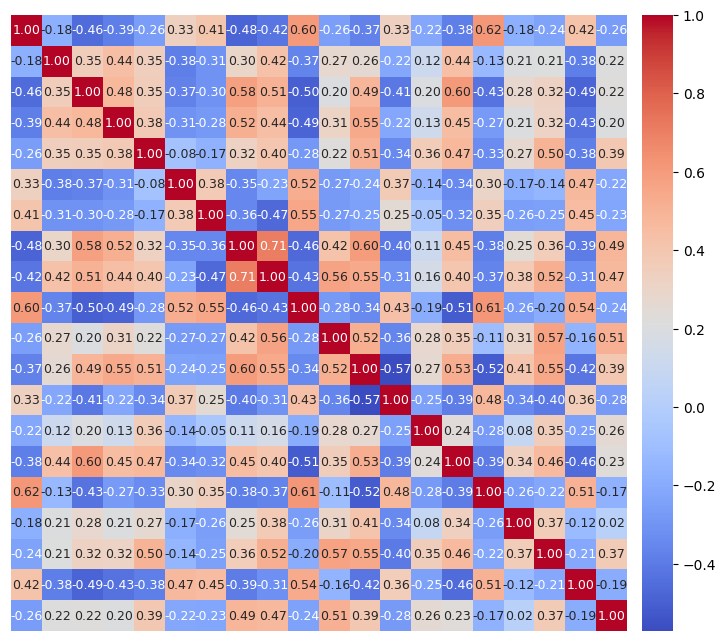

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 9},
           xticklabels= False, yticklabels= False, ax=ax, cbar_kws={"fraction": 0.056, "pad": 0.02},
           cmap= 'coolwarm')

<Axes: >

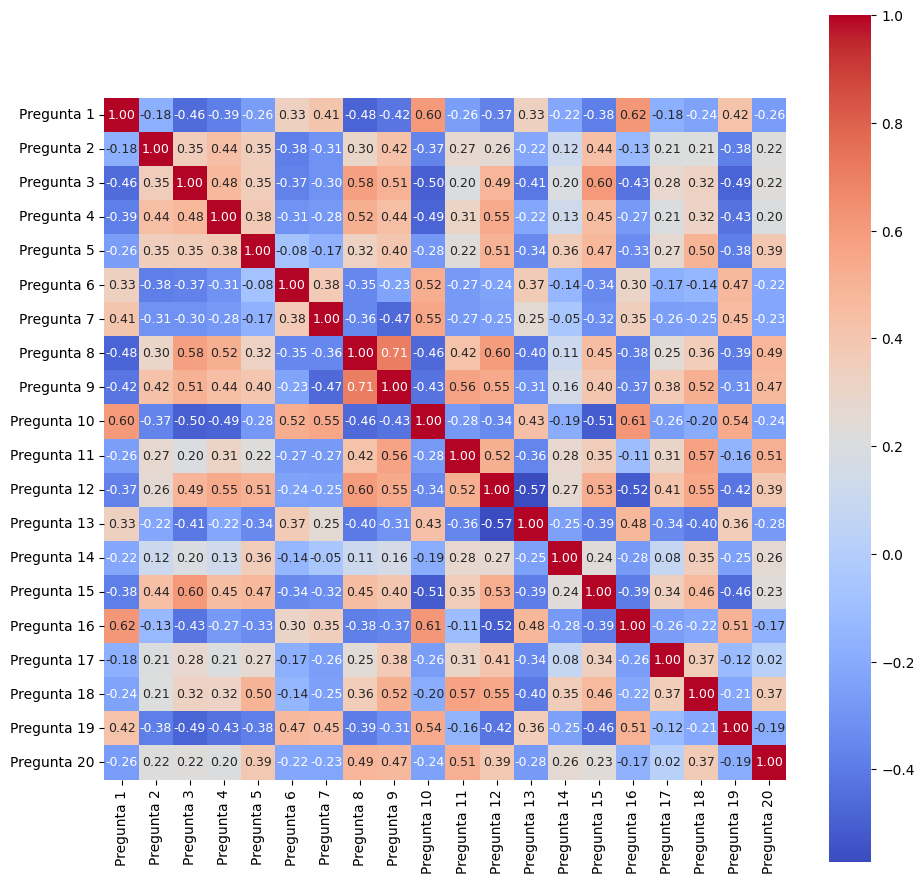

In [ ]:
corr = df.corr()
plt.figure(figsize=(11,11))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 9},
           xticklabels= corr, yticklabels= corr,
           cmap= 'coolwarm')

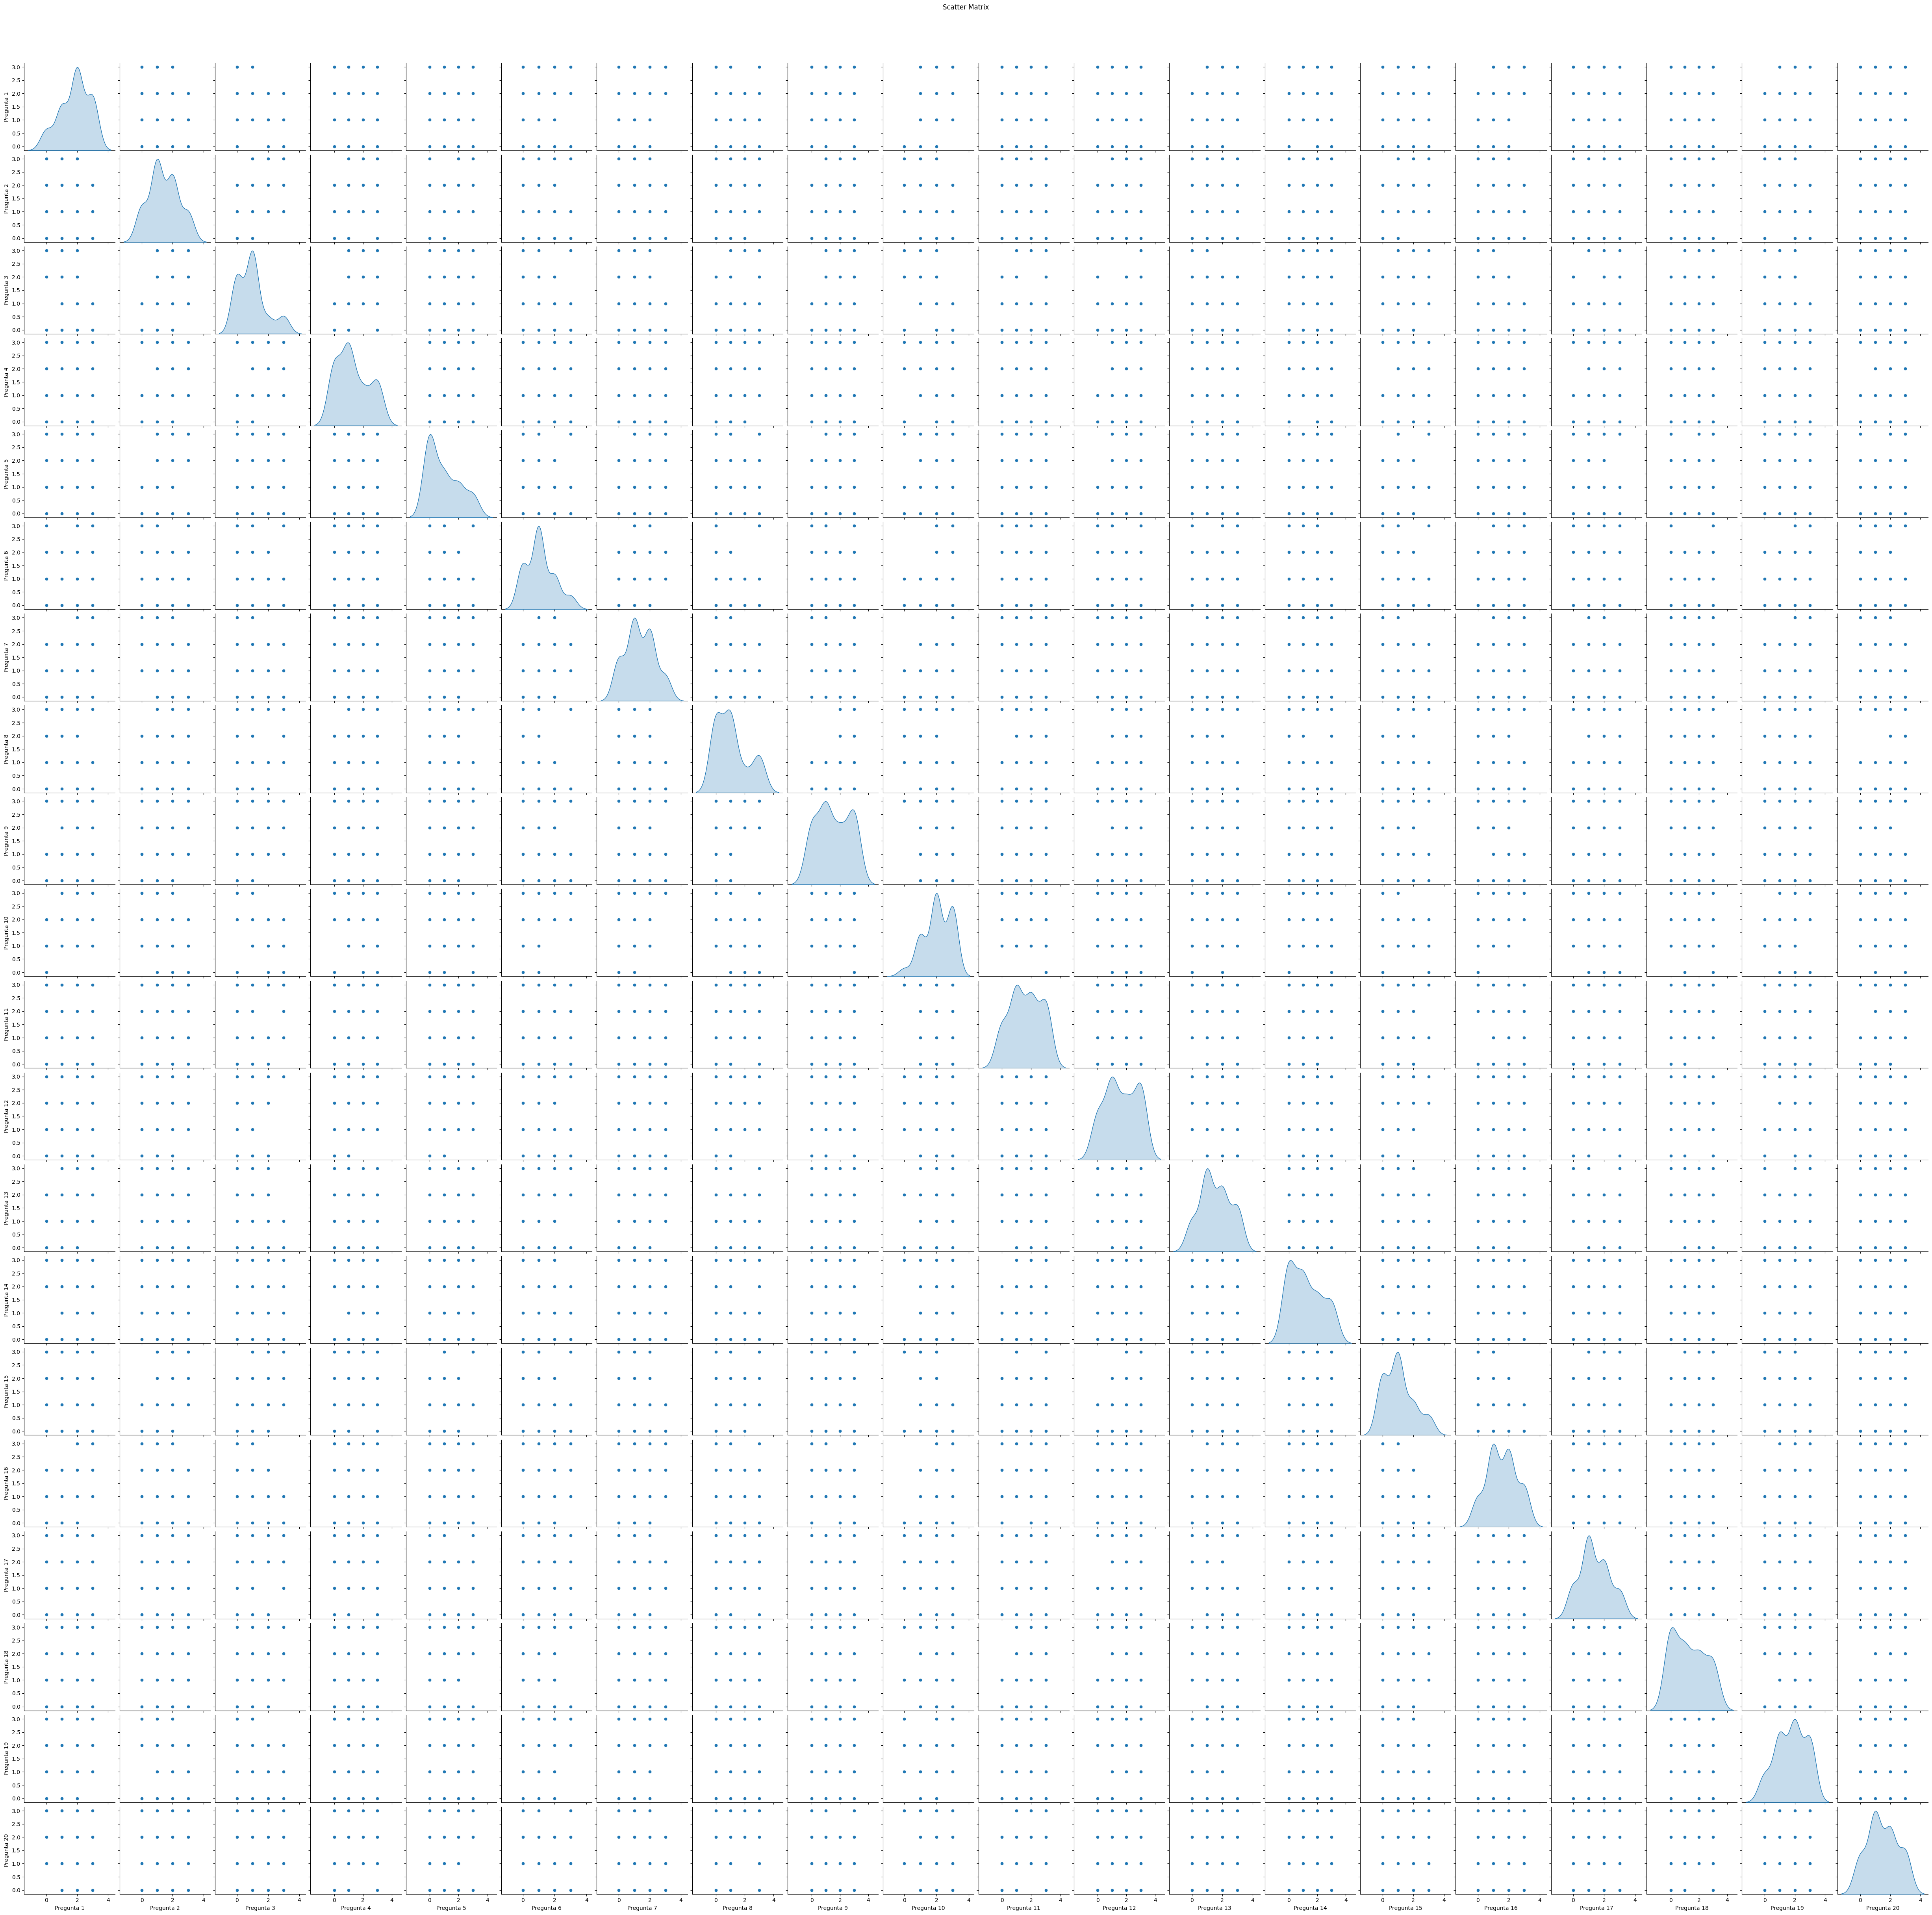

In [ ]:
pg = sns.pairplot(data = df, diag_kind='kde')
pg.fig.suptitle('Scatter Matrix')
pg.fig.subplots_adjust(top=0.95)

In [ ]:
def print_hist(data,title, ax):
    '''
        print_hist:
            Función para dibujar el histograma y la distribución de los datos.
    '''
    sns.histplot(data, alpha=0.4, kde=True, ax=ax)
    sns.rugplot(data, color="black", ax=ax)
    
    color = "orange"
    text=f"$\\mu$ = {data.mean():.3f}\n"
    text+=f"$\\sigma$ = {data.std(ddof=1):.3f}"

    bbox = dict(boxstyle='round', fc=color, ec=color, alpha=0.3)
    ax.text(0.72, 0.8, text, fontsize=11, bbox=bbox, transform=ax.transAxes)
    ax.set_title(title)

def print_dataset(df, fig_rows, fig_cols):
    '''
        print_dataset:
            Recibe un DataFrame, dibuja sus distribuciones de datos y cuenta cuántos tienen distribución normal
    '''
    cols = df.columns
    fig, axes = plt.subplots(fig_rows, fig_cols, figsize=((fig_cols*25)//5, (fig_rows*8)//2))
    axes = axes.ravel()

    for col_name, ax in zip(cols, axes):
        print_hist(df[col_name],"Distribución de " + col_name, ax)

    fig.tight_layout()
    plt.show()

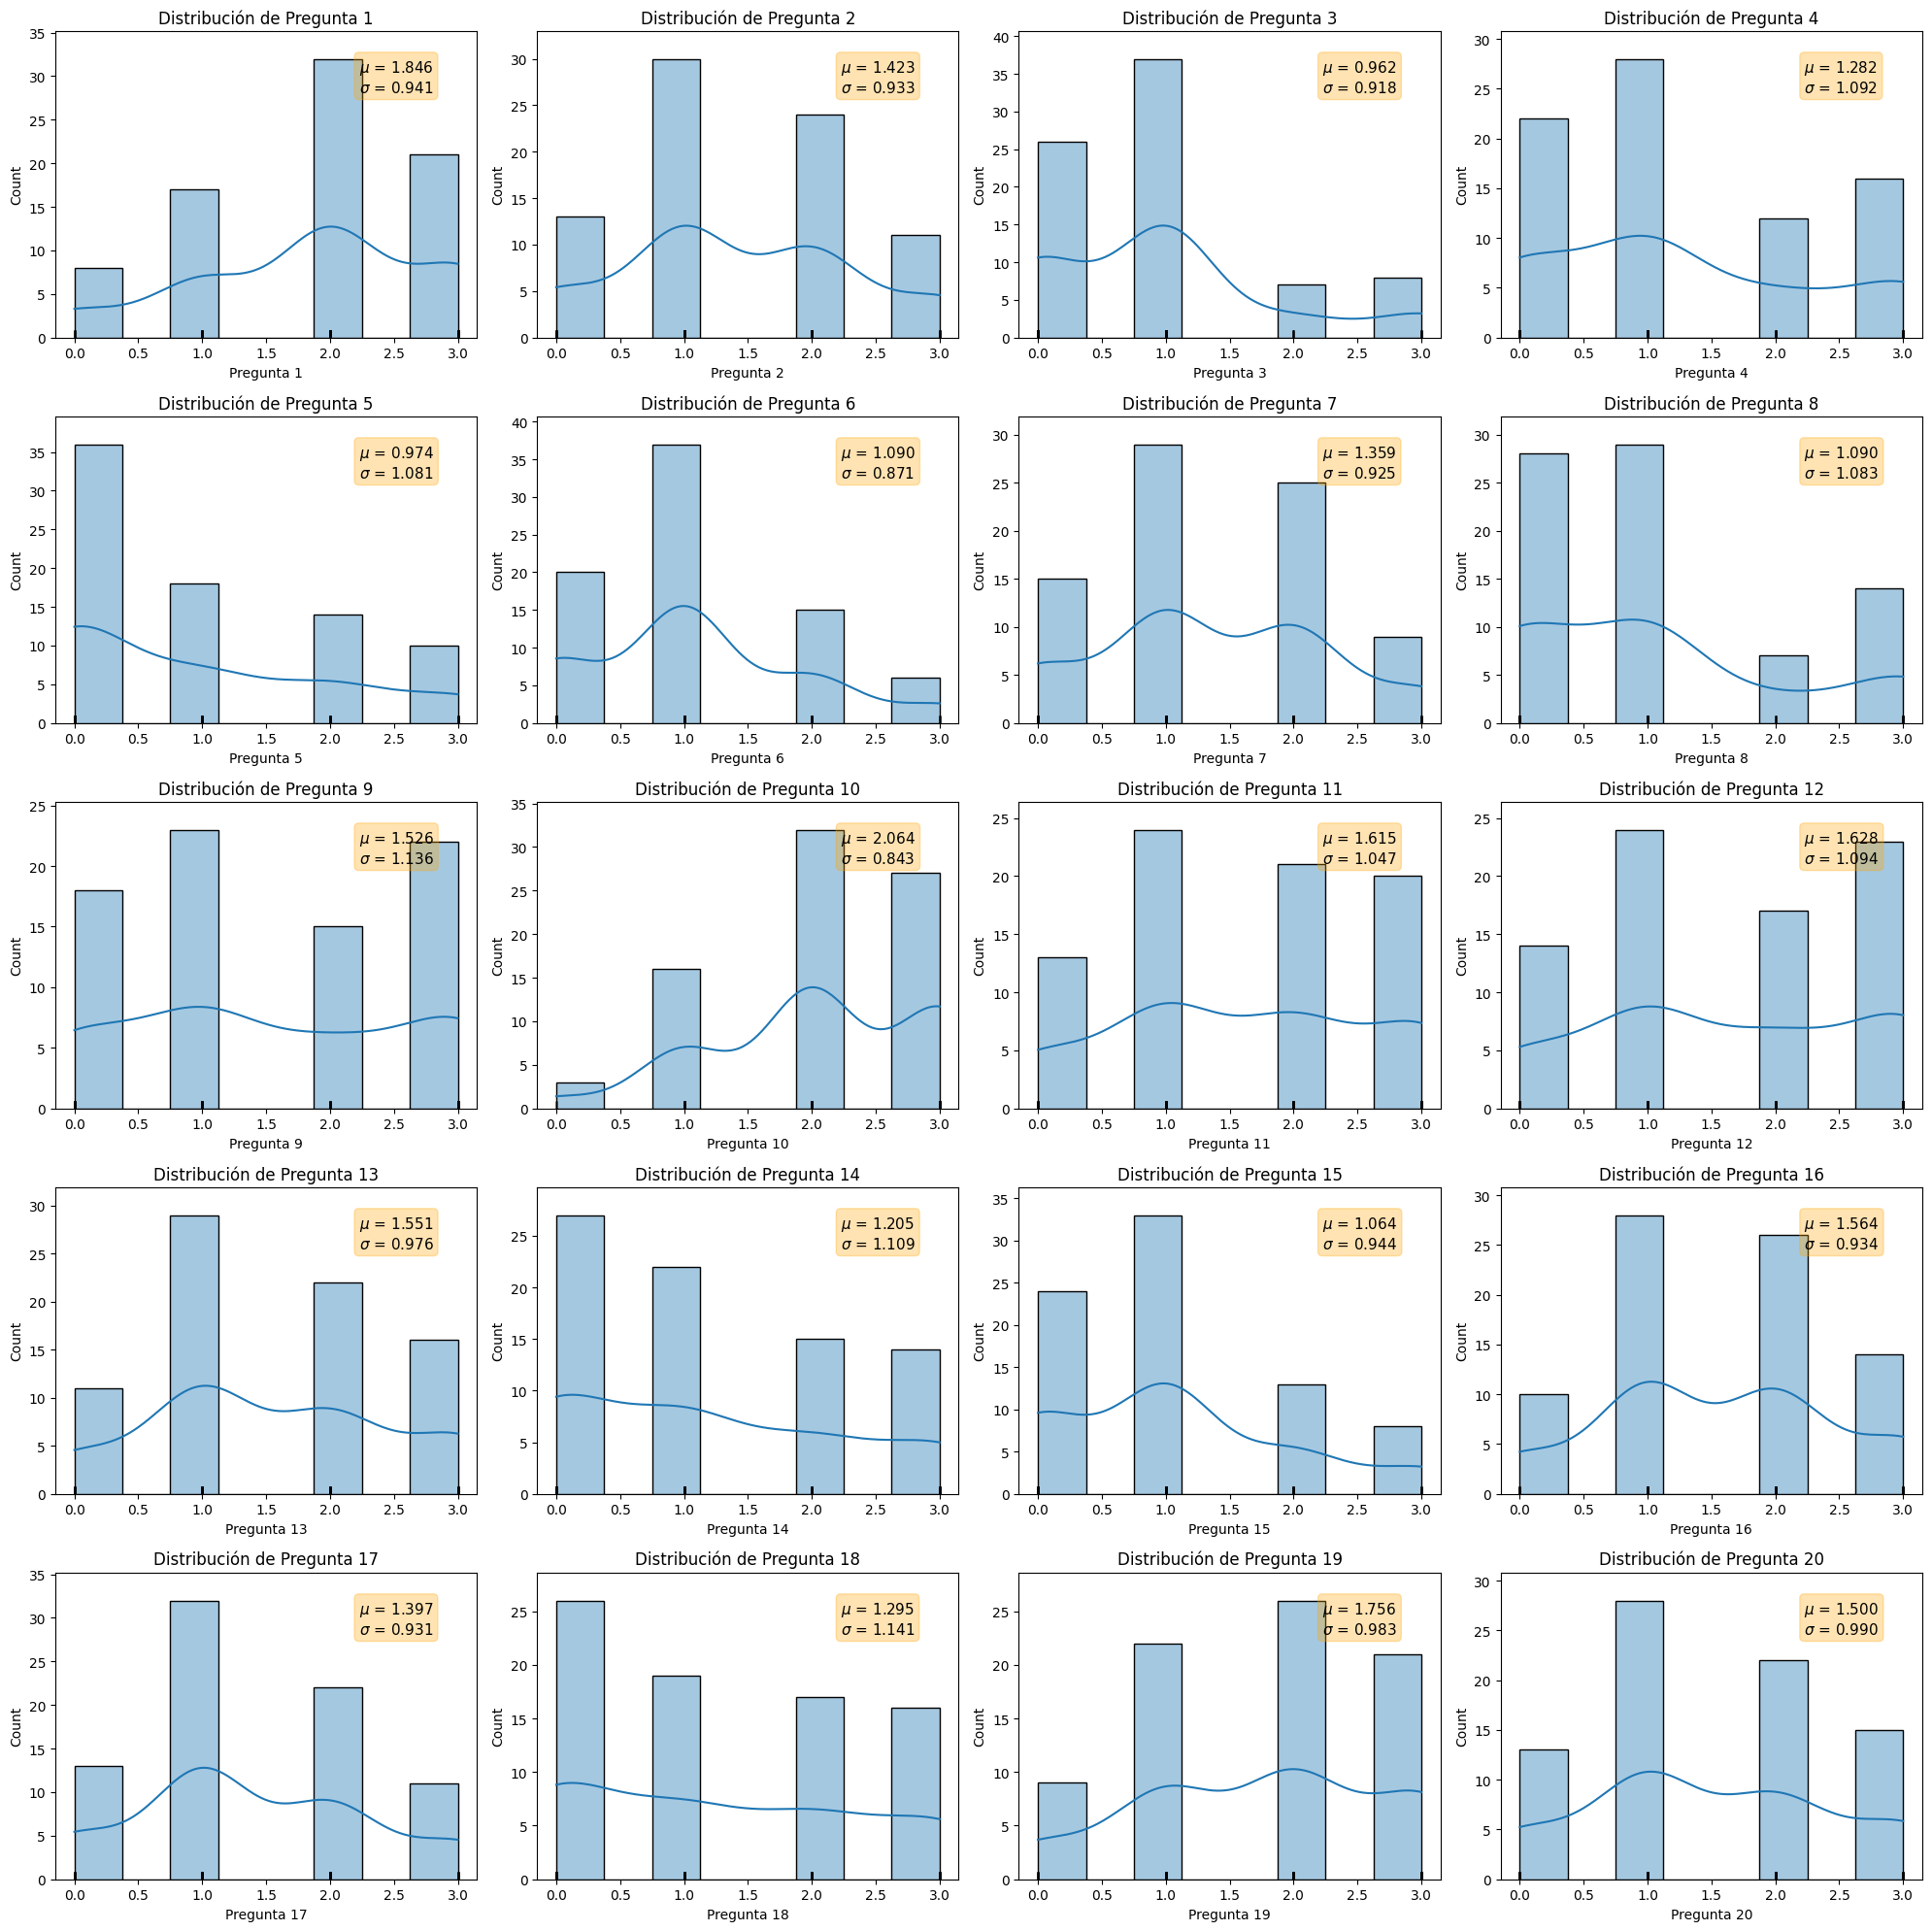

In [ ]:
print_dataset(df, 5, 4)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
df[X_cols] = StandardScaler().fit_transform(df[X_cols])
df_std = pd.DataFrame(df[X_cols], columns = df[X_cols].columns)

In [ ]:
df_std.head()

,Pregunta 1,Pregunta 2,Pregunta 3,Pregunta 4,Pregunta 5,Pregunta 6,Pregunta 7,Pregunta 8,Pregunta 9,Pregunta 10,Pregunta 11,Pregunta 12,Pregunta 13,Pregunta 14,Pregunta 15,Pregunta 16,Pregunta 17,Pregunta 18,Pregunta 19,Pregunta 20
0,1.234383,-1.535019,-1.054249,-1.181799,-0.907337,1.052227,0.697139,-0.083375,-1.351139,1.117798,0.369611,0.341935,-0.568701,-1.093615,-0.068314,0.469692,-0.429851,-1.142356,0.249461,-0.508211
1,0.164584,-0.456357,-1.054249,-1.181799,-0.907337,-0.103741,0.697139,-1.012407,-1.351139,-0.076562,1.330598,-1.497437,1.494495,0.721320,-1.134011,1.547221,-0.429851,-1.142356,0.249461,0.508211
2,0.164584,-0.456357,0.042170,0.661807,-0.907337,1.052227,0.697139,-0.083375,0.420102,-0.076562,-0.591377,-0.577751,0.462897,-0.186147,-0.068314,0.469692,-0.429851,-1.142356,0.249461,0.508211
3,-0.905214,0.622305,0.042170,0.661807,0.023877,-1.259709,-1.477935,1.774690,1.305723,-0.076562,1.330598,1.261621,-0.568701,-0.186147,-0.068314,-0.607837,0.651710,-0.260140,-0.774641,0.508211
4,0.164584,-0.456357,-1.054249,-1.181799,0.023877,1.052227,1.784676,-1.012407,-0.465519,1.117798,-1.552365,-0.577751,1.494495,-1.093615,-1.134011,0.469692,-0.429851,-1.142356,1.273563,-0.508211


###1.1 Reducción de la dimensionalidad

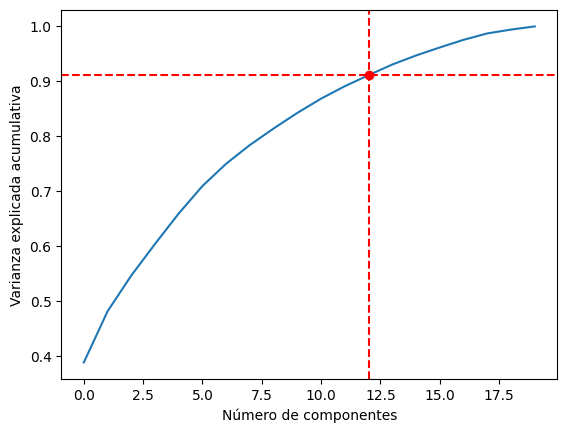

In [ ]:
from sklearn.decomposition import PCA

pca = PCA().fit(df_std)

# Plotea la varianza explicada por cada componente
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulativa')

# Encuentra la posición donde se alcanza el 0.9 de varianza explicada acumulativa
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
idx = np.argmax(cumsum_variance >= 0.9)

# Agrega un punto en la posición donde se alcanza el 0.9 de varianza explicada acumulativa
plt.plot(idx, cumsum_variance[idx], 'ro')

# Agrega una línea vertical desde el punto hasta el eje x
plt.axvline(x=idx, color='red', linestyle='--')

# Agrega una línea horizontal desde el punto hasta el eje y
plt.axhline(y=cumsum_variance[idx], color='red', linestyle='--')

plt.show()

In [ ]:
pca = PCA(n_components=20).fit(df_std)

# Obtiene los eigenvalues y los vectores de cada componente principal
eigenvalues = pca.explained_variance_
vectors = pca.components_

# Crea una tabla para imprimir los resultados
table = pd.DataFrame(columns=['Componente', 'Eigenvalue'])
for i in range(pca.n_components_):
    table = table.append({'Componente': i+1, 'Eigenvalue': eigenvalues[i]}, ignore_index=True)

# Imprime la tabla
print(table)

    Componente  Eigenvalue
0          1.0    7.880214
1          2.0    1.883089
2          3.0    1.319386
3          4.0    1.162889
4          5.0    1.122869
5          6.0    1.013109
6          7.0    0.821548
7          8.0    0.689320
8          9.0    0.607982
9         10.0    0.575320
10        11.0    0.524824
11        12.0    0.457400
12        13.0    0.406077
13        14.0    0.392783
14        15.0    0.332619
15        16.0    0.295568
16        17.0    0.280663
17        18.0    0.235848
18        19.0    0.142395
19        20.0    0.115837


In [ ]:
pca = PCA(n_components=12)
pca.fit(df_std)

# Calcula la varianza explicada acumulativa
cumulative_var_ratio = pca.explained_variance_ratio_.cumsum()

# Crea una tabla para imprimir los resultados
table = pd.DataFrame({
    'Componente principal': range(1, 13),
    'Varianza explicada': pca.explained_variance_ratio_,
    'Varianza acumulada': cumulative_var_ratio
})



# Imprime la tabla
var_acu = pca.explained_variance_ratio_.sum()

print(table)
print("La suma de la varianza acumulativa para las primeras 12 componentes principales es {:.6f}".format(var_acu))

    Componente principal  Varianza explicada  Varianza acumulada
0                      1            0.388959            0.388959
1                      2            0.092947            0.481907
2                      3            0.065124            0.547030
3                      4            0.057399            0.604429
4                      5            0.055424            0.659853
5                      6            0.050006            0.709859
6                      7            0.040551            0.750410
7                      8            0.034024            0.784434
8                      9            0.030009            0.814443
9                     10            0.028397            0.842840
10                    11            0.025905            0.868745
11                    12            0.022577            0.891322
La suma de la varianza acumulativa para las primeras 12 componentes principales es 0.891322


Después de analizar la gráfica, para poder explicar el resultado del test con un 90% de varianza explicada acumulativa se requiere de 12 componentes principales.
La varianza explicada acumulativa es útil para determinar cuántos componentes principales se deben retener en un PCA. Al elegir un número suficientemente pequeño de componentes principales, se puede reducir la dimensionalidad de los datos sin perder mucha información.
Tomaremos este 90% para comenzar con el analisis predictivo y los clusters respectivos

In [ ]:
pca2 = PCA(n_components=12, random_state=0)

In [ ]:
pca_2 = pca2.fit_transform(df_std)

In [ ]:
df_2 = pd.DataFrame({'PCA1':pca_2[:,0],'PCA2':pca_2[:,1],
                     'PCA3':pca_2[:,2],'PCA4':pca_2[:,3],
                     'PCA5':pca_2[:,4],'PCA6':pca_2[:,5],
                     'PCA7':pca_2[:,6],'PCA8':pca_2[:,7],
                     'PCA9':pca_2[:,8],'PCA10':pca_2[:,9],
                     'PCA11':pca_2[:,10],'PCA12':pca_2[:,11],
                     'Categoria':df['Categoria']
                     })

In [ ]:
df_2

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,Categoria
0,-2.754464,0.533853,0.495442,0.415819,-1.033006,0.161627,-1.327897,0.846369,-0.552726,-0.840169,-0.206252,-0.384159,Ansiedad promedio mujeres
1,-2.889713,0.281190,-0.684590,1.380175,1.170428,-1.429576,0.175184,-1.100812,0.135586,0.434267,-0.210232,0.670190,Ansiedad sobre promedio mujeres
2,-1.198184,-0.237004,-0.525612,0.205798,0.275281,1.290758,-0.128374,-0.448777,0.179535,0.414094,0.018383,-0.117494,Ansiedad sobre promedio mujeres
3,3.035961,-0.216329,-1.370196,0.970711,-0.698454,-0.060579,-0.228653,0.258875,-0.795184,0.329719,0.876098,-0.063479,Ansiedad sobre promedio mujeres
4,-3.962925,0.127108,0.295839,-0.304925,-0.097519,1.251326,0.293267,0.397156,0.236913,1.103027,-0.412605,0.289942,Ansiedad sobre promedio mujeres
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,-2.566051,-0.039208,-1.700744,0.992004,1.581898,-0.213730,-0.101509,0.378977,0.821444,0.458389,-0.176203,-0.086224,Ansiedad sobre promedio mujeres
74,1.371683,0.098975,0.483071,0.216635,-1.063270,0.107905,-0.184634,-1.525370,-1.255094,-0.054623,0.297539,-0.356347,Ansiedad promedio mujeres
75,-4.607479,0.551739,-0.907901,-0.261666,0.380188,0.912524,0.674401,0.157168,0.716361,-0.524820,-0.706676,-0.856709,Ansiedad sobre promedio mujeres
76,0.403119,0.847973,-0.190160,0.142313,1.213242,-0.265489,-0.523990,0.866889,-0.820354,-1.093119,-0.591420,1.207991,Ansiedad sobre promedio mujeres


<Axes: >

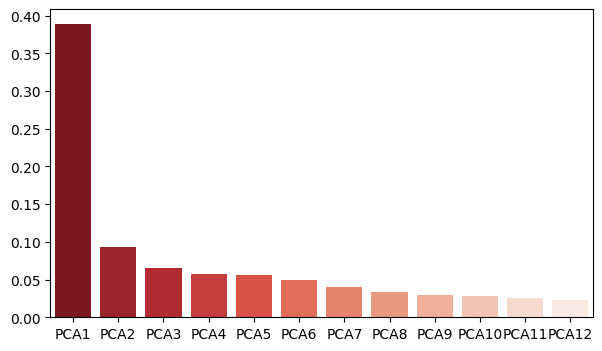

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(x = ['PCA1','PCA2','PCA3','PCA4','PCA5',
                 'PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12'], y = pca2.explained_variance_ratio_, palette = "Reds_r")

<Axes: xlabel='PCA1', ylabel='PCA2'>

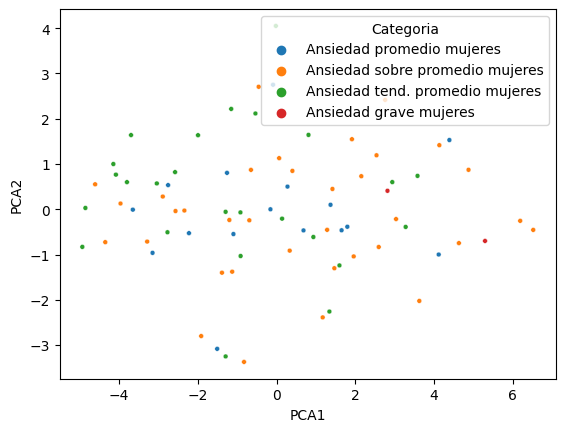

In [ ]:
#@title Seleccione la data { run: "auto" }
EjeX  = 'PCA1' #@param ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA112']
EjeY  = 'PCA2' #@param ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA112']

sns.scatterplot(x = EjeX, y = EjeY , hue = 'Categoria', data = df_2, s=12)


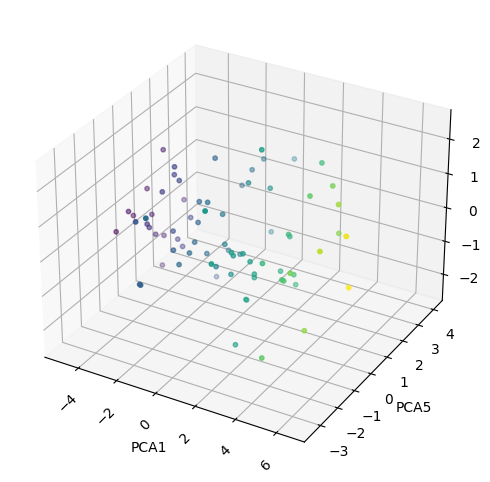

In [ ]:
#@title Seleccione la data { run: "auto" }
EjeX  = 'PCA1' #@param ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA112']
EjeY  = 'PCA2' #@param ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA112']
EjeZ  = 'PCA5' #@param ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA112']

variables=[EjeX, EjeY, EjeZ]
fig = plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, projection='3d')

ax.scatter3D(df_2[variables[0]].values, df_2[variables[1]].values, df_2[variables[2]].values, c=df_2[EjeX], marker='o', s=10)
ax.set_xlabel(variables[0])
ax.set_ylabel(variables[1])
ax.set_ylabel(variables[2])
plt.xticks(rotation=45)

plt.show()

In [253]:
import plotly.graph_objs as go

In [ ]:
#@title Seleccione la data { run: "auto" }
EjeX  = 'PCA1' #@param ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA112']
EjeY  = 'PCA4' #@param ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA112']
EjeZ  = 'PCA5' #@param ['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA112']

fig = go.Figure(data=[go.Scatter3d(
    x=df_2[EjeX],
    y=df_2[EjeY],
    z=df_2[EjeZ],
    mode='markers',
    marker=dict(
        size=5,
        color=df_2[EjeX],
        colorscale='Viridis',
        opacity=0.9
    )
)])

fig.show()

<Axes: xlabel='PCA1', ylabel='PCA2'>

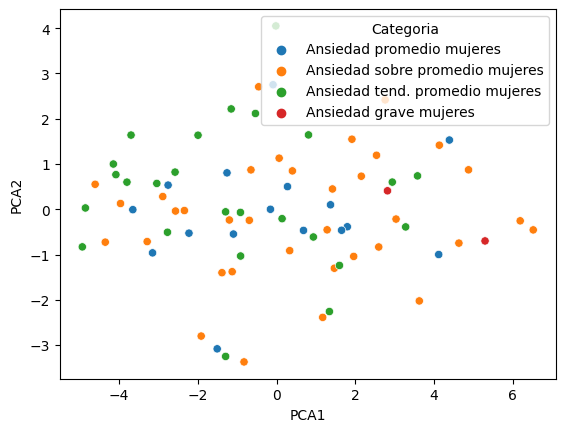

In [ ]:
sns.scatterplot(x = 'PCA1', y = 'PCA2', hue = 'Categoria', data = df_2)

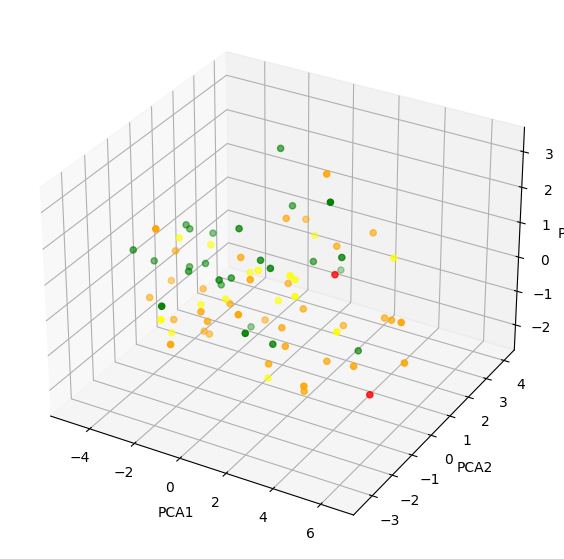

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
x = df_2['PCA1']
y = df_2['PCA2']
z = df_2['PCA3']

col = df_2['Categoria'].map(
    {'Ansiedad grave mujeres':'red',
     'Ansiedad sobre promedio mujeres':'orange',
      'Ansiedad promedio mujeres':'yellow',
     'Ansiedad tend. promedio mujeres':'green'    

    }
)

ax.scatter(x,y,z, c = col, marker ='o' )
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.show()

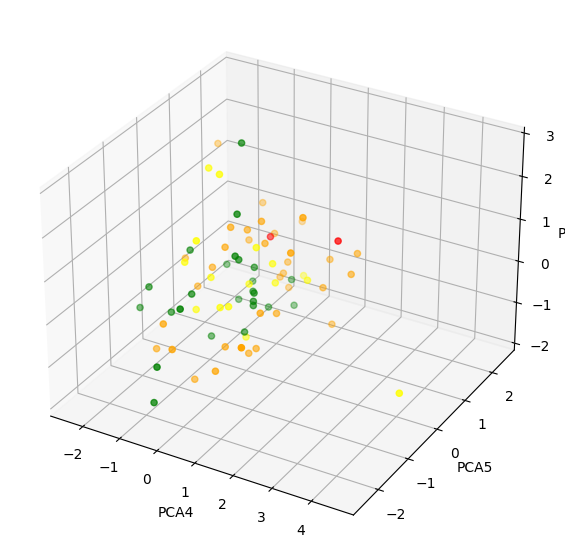

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
x = df_2['PCA4']
y = df_2['PCA5']
z = df_2['PCA6']

col = df_2['Categoria'].map(
    {'Ansiedad grave mujeres':'red',
     'Ansiedad sobre promedio mujeres':'orange',
      'Ansiedad promedio mujeres':'yellow',
     'Ansiedad tend. promedio mujeres':'green'    

    }
)

ax.scatter(x,y,z, c = col, marker ='o' )
ax.set_xlabel('PCA4')
ax.set_ylabel('PCA5')
ax.set_zlabel('PCA6')

plt.show()

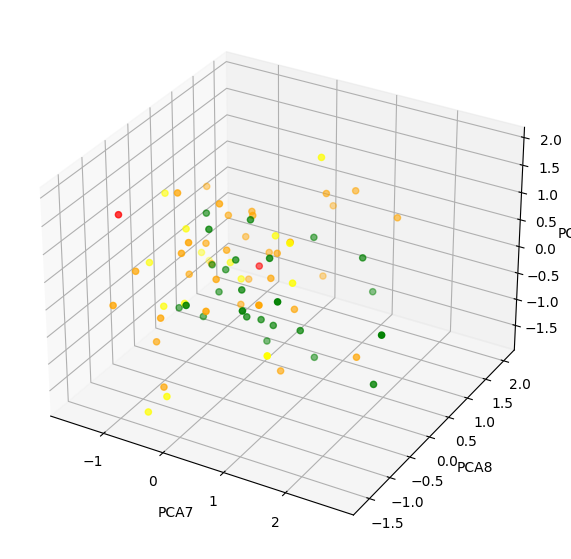

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
x = df_2['PCA7']
y = df_2['PCA8']
z = df_2['PCA9']

col = df_2['Categoria'].map(
    {'Ansiedad grave mujeres':'red',
     'Ansiedad sobre promedio mujeres':'orange',
      'Ansiedad promedio mujeres':'yellow',
     'Ansiedad tend. promedio mujeres':'green'    

    }
)

ax.scatter(x,y,z, c = col, marker ='o' )
ax.set_xlabel('PCA7')
ax.set_ylabel('PCA8')
ax.set_zlabel('PCA9')

plt.show()

##2.1. Entrenamiento del clasificador

In [ ]:
df_2

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,Categoria
0,-2.754464,0.533853,0.495442,0.415819,-1.033006,0.161627,-1.327897,0.846369,-0.552726,-0.840169,-0.206252,-0.384159,Ansiedad promedio mujeres
1,-2.889713,0.281190,-0.684590,1.380175,1.170428,-1.429576,0.175184,-1.100812,0.135586,0.434267,-0.210232,0.670190,Ansiedad sobre promedio mujeres
2,-1.198184,-0.237004,-0.525612,0.205798,0.275281,1.290758,-0.128374,-0.448777,0.179535,0.414094,0.018383,-0.117494,Ansiedad sobre promedio mujeres
3,3.035961,-0.216329,-1.370196,0.970711,-0.698454,-0.060579,-0.228653,0.258875,-0.795184,0.329719,0.876098,-0.063479,Ansiedad sobre promedio mujeres
4,-3.962925,0.127108,0.295839,-0.304925,-0.097519,1.251326,0.293267,0.397156,0.236913,1.103027,-0.412605,0.289942,Ansiedad sobre promedio mujeres
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,-2.566051,-0.039208,-1.700744,0.992004,1.581898,-0.213730,-0.101509,0.378977,0.821444,0.458389,-0.176203,-0.086224,Ansiedad sobre promedio mujeres
74,1.371683,0.098975,0.483071,0.216635,-1.063270,0.107905,-0.184634,-1.525370,-1.255094,-0.054623,0.297539,-0.356347,Ansiedad promedio mujeres
75,-4.607479,0.551739,-0.907901,-0.261666,0.380188,0.912524,0.674401,0.157168,0.716361,-0.524820,-0.706676,-0.856709,Ansiedad sobre promedio mujeres
76,0.403119,0.847973,-0.190160,0.142313,1.213242,-0.265489,-0.523990,0.866889,-0.820354,-1.093119,-0.591420,1.207991,Ansiedad sobre promedio mujeres


In [ ]:
from sklearn import neighbors
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df_3 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ANSIEDAD_3.xlsx')
df_3.head(10) #Esta función devuelve las primeras n filas del objeto se según la posición.

,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,Question10,...,Question12,Question13,Question14,Question15,Question16,Question17,Question18,Question19,Question20,category
0,3,0,0,0,0,2,2,1,0,3,...,2,1,0,1,2,1,0,2,1,Ansiedad promedio mujeres
1,2,1,0,0,0,1,2,0,0,2,...,0,3,2,0,3,1,0,2,2,Ansiedad sobre promedio mujeres
2,2,1,1,2,0,2,2,1,2,2,...,1,2,1,1,2,1,0,2,2,Ansiedad sobre promedio mujeres
3,1,2,1,2,1,0,0,3,3,2,...,3,1,1,1,1,2,1,1,2,Ansiedad sobre promedio mujeres
4,2,1,0,0,1,2,3,0,1,3,...,1,3,0,0,2,1,0,3,1,Ansiedad sobre promedio mujeres
5,3,1,1,1,0,1,1,1,1,3,...,1,2,1,0,2,1,0,2,1,Ansiedad promedio mujeres
6,3,1,0,3,3,3,2,3,3,3,...,3,2,0,1,3,0,3,3,2,Ansiedad tend. promedio mujeres
7,1,1,2,1,0,1,2,1,1,1,...,0,1,0,0,1,0,0,2,0,Ansiedad promedio mujeres
8,3,2,1,0,0,1,3,0,0,3,...,0,3,0,1,3,1,0,3,0,Ansiedad sobre promedio mujeres
9,0,3,3,3,2,0,0,2,3,1,...,3,1,0,2,1,1,3,0,3,Ansiedad grave mujeres


In [149]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
labelEncoder = LabelEncoder()
df_3["category"] = labelEncoder.fit_transform(df_3["category"])
df_3

,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,Question10,...,Question12,Question13,Question14,Question15,Question16,Question17,Question18,Question19,Question20,category
0,3,0,0,0,0,2,2,1,0,3,...,2,1,0,1,2,1,0,2,1,1
1,2,1,0,0,0,1,2,0,0,2,...,0,3,2,0,3,1,0,2,2,2
2,2,1,1,2,0,2,2,1,2,2,...,1,2,1,1,2,1,0,2,2,2
3,1,2,1,2,1,0,0,3,3,2,...,3,1,1,1,1,2,1,1,2,2
4,2,1,0,0,1,2,3,0,1,3,...,1,3,0,0,2,1,0,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2,2,1,1,0,1,1,0,1,3,...,0,2,1,0,3,0,0,3,3,2
464,1,1,1,3,0,1,1,1,2,2,...,3,1,2,1,1,2,2,2,1,1
465,3,1,0,0,0,3,2,0,1,3,...,0,3,0,1,3,0,0,3,1,2
466,2,1,1,2,2,1,1,1,0,2,...,2,1,1,1,3,1,2,1,3,2


###2.1.1. KNN

In [ ]:
#@title Seleccione el procentaje de prueba { run: "auto" }
test_size1 = 0.3 #@param {type:"slider", min:0, max:1, step:0.1}
X_ent = np.array(df_3.drop(['category'], 1))
y_ent = np.array(df_3['category'])
X_train, X_test, y_train, y_test = train_test_split(X_ent, y_ent, test_size=test_size1)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 327 datos para entrenamiento y 141 datos para prueba


Uso de GridSearchCV para selección de la cantidad de vecinos

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
n_splits = 8
knn = KNeighborsClassifier()
k_range = list(range(1, int(np.sqrt(X_ent.shape[0]))))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(knn, param_grid, cv=n_splits, scoring='accuracy', return_train_score=False,verbose=3)
grid_search=grid.fit(X_ent, y_ent)

Fitting 8 folds for each of 20 candidates, totalling 160 fits
[CV 1/8] END .....................n_neighbors=1;, score=1.000 total time=   0.1s
[CV 2/8] END .....................n_neighbors=1;, score=1.000 total time=   0.0s
[CV 3/8] END .....................n_neighbors=1;, score=1.000 total time=   0.0s
[CV 4/8] END .....................n_neighbors=1;, score=1.000 total time=   0.0s
[CV 5/8] END .....................n_neighbors=1;, score=1.000 total time=   0.0s
[CV 6/8] END .....................n_neighbors=1;, score=1.000 total time=   0.0s
[CV 7/8] END .....................n_neighbors=1;, score=1.000 total time=   0.0s
[CV 8/8] END .....................n_neighbors=1;, score=1.000 total time=   0.0s
[CV 1/8] END .....................n_neighbors=2;, score=1.000 total time=   0.0s
[CV 2/8] END .....................n_neighbors=2;, score=1.000 total time=   0.0s
[CV 3/8] END .....................n_neighbors=2;, score=1.000 total time=   0.0s
[CV 4/8] END .....................n_neighbors=2

Como resultado nos indica que es idoneo utilizar hasta 9 vecinos cercanos, por tanto se opta por utilizar 5 vecinos

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
print('Precisión Vecinos más Cercanos: {}'.format(metrics.accuracy_score(Y_pred,y_test)))

Precisión Vecinos más Cercanos: 0.9361702127659575


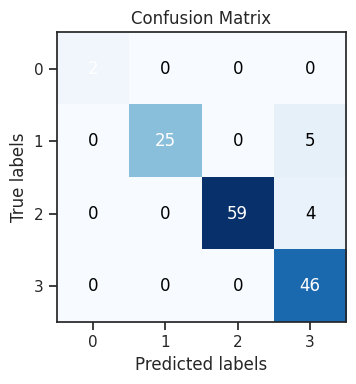

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matc=confusion_matrix(y_test, Y_pred,  labels=[0, 1, 2,3])
plot_confusion_matrix(conf_mat=matc, figsize=(4,4), show_normed=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.tight_layout()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
print(metrics.classification_report(y_test, Y_pred, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         2
           1     1.0000    0.8333    0.9091        30
           2     1.0000    0.9365    0.9672        63
           3     0.8364    1.0000    0.9109        46

    accuracy                         0.9362       141
   macro avg     0.9591    0.9425    0.9468       141
weighted avg     0.9466    0.9362    0.9369       141



###2.1.2. Random Foreste

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
n_splits = 8
random = RandomForestClassifier()
k_range = list(range(1, int(np.sqrt(X_ent.shape[0]))))
param_grid = dict(n_estimators=k_range)
  
grid = GridSearchCV(random, param_grid, cv=n_splits, scoring='accuracy', return_train_score=False,verbose=3)
grid_search=grid.fit(X_ent, y_ent)

Fitting 8 folds for each of 20 candidates, totalling 160 fits
[CV 1/8] END ....................n_estimators=1;, score=1.000 total time=   0.0s
[CV 2/8] END ....................n_estimators=1;, score=1.000 total time=   0.0s
[CV 3/8] END ....................n_estimators=1;, score=1.000 total time=   0.0s
[CV 4/8] END ....................n_estimators=1;, score=0.983 total time=   0.0s
[CV 5/8] END ....................n_estimators=1;, score=1.000 total time=   0.0s
[CV 6/8] END ....................n_estimators=1;, score=1.000 total time=   0.0s
[CV 7/8] END ....................n_estimators=1;, score=1.000 total time=   0.0s
[CV 8/8] END ....................n_estimators=1;, score=1.000 total time=   0.0s
[CV 1/8] END ....................n_estimators=2;, score=1.000 total time=   0.0s
[CV 2/8] END ....................n_estimators=2;, score=1.000 total time=   0.0s
[CV 3/8] END ....................n_estimators=2;, score=1.000 total time=   0.0s
[CV 4/8] END ....................n_estimators=2

In [ ]:
model=RandomForestClassifier(n_estimators=5)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
print('Precisión RandomForest: {}'.format(metrics.accuracy_score(Y_pred,y_test)))

Precisión RandomForest: 0.9645390070921985


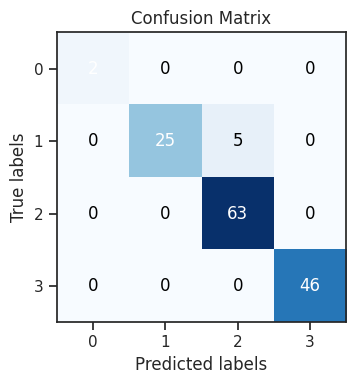

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matc=confusion_matrix(y_test, Y_pred,  labels=[0, 1, 2,3])
plot_confusion_matrix(conf_mat=matc, figsize=(4,4), show_normed=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.tight_layout()

In [ ]:
model=RandomForestClassifier(n_estimators=6)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
print('Precisión RandomForest: {}'.format(metrics.accuracy_score(Y_pred,y_test)))

Precisión RandomForest: 1.0


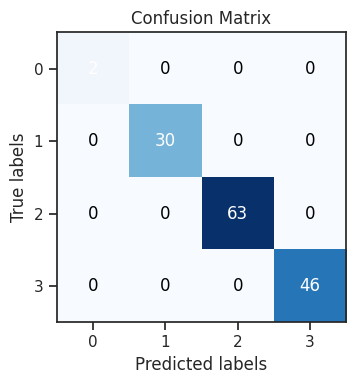

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matc=confusion_matrix(y_test, Y_pred,  labels=[0, 1, 2,3])
plot_confusion_matrix(conf_mat=matc, figsize=(4,4), show_normed=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.tight_layout()

##3.1. LDA

In [222]:
df_or = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ANSIEDAD_3.xlsx')
df_or #Esta función devuelve las primeras n filas del objeto se según la posición.

,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,Question10,...,Question12,Question13,Question14,Question15,Question16,Question17,Question18,Question19,Question20,category
0,3,0,0,0,0,2,2,1,0,3,...,2,1,0,1,2,1,0,2,1,Ansiedad promedio mujeres
1,2,1,0,0,0,1,2,0,0,2,...,0,3,2,0,3,1,0,2,2,Ansiedad sobre promedio mujeres
2,2,1,1,2,0,2,2,1,2,2,...,1,2,1,1,2,1,0,2,2,Ansiedad sobre promedio mujeres
3,1,2,1,2,1,0,0,3,3,2,...,3,1,1,1,1,2,1,1,2,Ansiedad sobre promedio mujeres
4,2,1,0,0,1,2,3,0,1,3,...,1,3,0,0,2,1,0,3,1,Ansiedad sobre promedio mujeres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2,2,1,1,0,1,1,0,1,3,...,0,2,1,0,3,0,0,3,3,Ansiedad sobre promedio mujeres
464,1,1,1,3,0,1,1,1,2,2,...,3,1,2,1,1,2,2,2,1,Ansiedad promedio mujeres
465,3,1,0,0,0,3,2,0,1,3,...,0,3,0,1,3,0,0,3,1,Ansiedad sobre promedio mujeres
466,2,1,1,2,2,1,1,1,0,2,...,2,1,1,1,3,1,2,1,3,Ansiedad sobre promedio mujeres


In [223]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
labelEncoder = LabelEncoder()
df_lda["category"] = labelEncoder.fit_transform(df_or["category"])
df_lda

,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8,Question9,Question10,...,Question12,Question13,Question14,Question15,Question16,Question17,Question18,Question19,Question20,category
0,3,0,0,0,0,2,2,1,0,3,...,2,1,0,1,2,1,0,2,1,1
1,2,1,0,0,0,1,2,0,0,2,...,0,3,2,0,3,1,0,2,2,2
2,2,1,1,2,0,2,2,1,2,2,...,1,2,1,1,2,1,0,2,2,2
3,1,2,1,2,1,0,0,3,3,2,...,3,1,1,1,1,2,1,1,2,2
4,2,1,0,0,1,2,3,0,1,3,...,1,3,0,0,2,1,0,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,2,2,1,1,0,1,1,0,1,3,...,0,2,1,0,3,0,0,3,3,2
464,1,1,1,3,0,1,1,1,2,2,...,3,1,2,1,1,2,2,2,1,1
465,3,1,0,0,0,3,2,0,1,3,...,0,3,0,1,3,0,0,3,1,2
466,2,1,1,2,2,1,1,1,0,2,...,2,1,1,1,3,1,2,1,3,2


In [244]:
X = np.array(df_lda.drop(['category'], 1))
y = np.array(df_lda['category'])

In [245]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [248]:
lda = LinearDiscriminantAnalysis(n_components=3)

In [249]:
lda.fit_transform(X, y)

array([[-0.48073811,  0.30306322, -0.86039403],
       [-0.94549191,  0.74948594,  1.59235185],
       [-0.87248285,  0.11378191, -0.40248452],
       ...,
       [-0.14377214,  0.97453795, -0.51690888],
       [ 0.85769715,  1.0708341 ,  2.10739434],
       [-1.25638333,  1.10426763,  0.68143157]])

In [250]:
X_transformed = lda.transform(X)

AttributeError: ignored

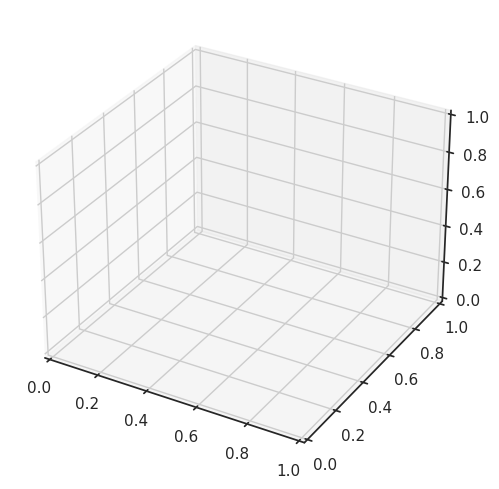

In [264]:
fig = plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, projection='3d')

ax.scatter3D(X_transformed[0].values, X_transformed[1].values, X_transformed[2].values, c=X_transformed[0], marker='o', s=10)
ax.set_xlabel('1')
ax.set_ylabel('2')
ax.set_ylabel('3')
plt.xticks(rotation=45)

plt.show()

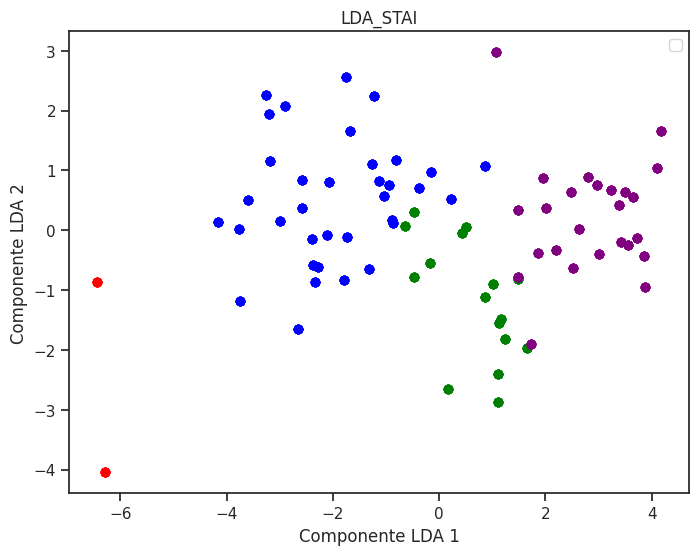

In [251]:
colors = ['red', 'green', 'blue', 'purple']
plt.figure(figsize=(8, 6))
for target, color in zip(set(y), colors):
    plt.scatter(X_transformed[y == target, 0], X_transformed[y == target, 1], color=color)

plt.xlabel('Componente LDA 1')
plt.ylabel('Componente LDA 2')
plt.legend()
plt.title('LDA_STAI')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def print_hist(data,title, ax):
    '''
        print_hist:
            Función para dibujar el histograma y la distribución de los datos.
    '''
    sns.histplot(data, alpha=0.4, kde=True, ax=ax)
    sns.rugplot(data, color="black", ax=ax)
    
    color = "orange"
    text=f"$\\mu$ = {data.mean():.3f}\n"
    text+=f"$\\sigma$ = {data.std(ddof=1):.3f}"

    bbox = dict(boxstyle='round', fc=color, ec=color, alpha=0.3)
    ax.text(0.72, 0.8, text, fontsize=11, bbox=bbox, transform=ax.transAxes)
    ax.set_title(title)

def print_dataset(df, fig_rows, fig_cols):
    '''
        print_dataset:
            Recibe un DataFrame, dibuja sus distribuciones de datos y cuenta cuántos tienen distribución normal
    '''
    cols = df.columns
    fig, axes = plt.subplots(fig_rows, fig_cols, figsize=((fig_cols*25)//5, (fig_rows*8)//2))
    axes = axes.ravel()

    for col_name, ax in zip(cols, axes):
        print_hist(df[col_name],"Distribución de " + col_name, ax)

    fig.tight_layout()
    plt.show()

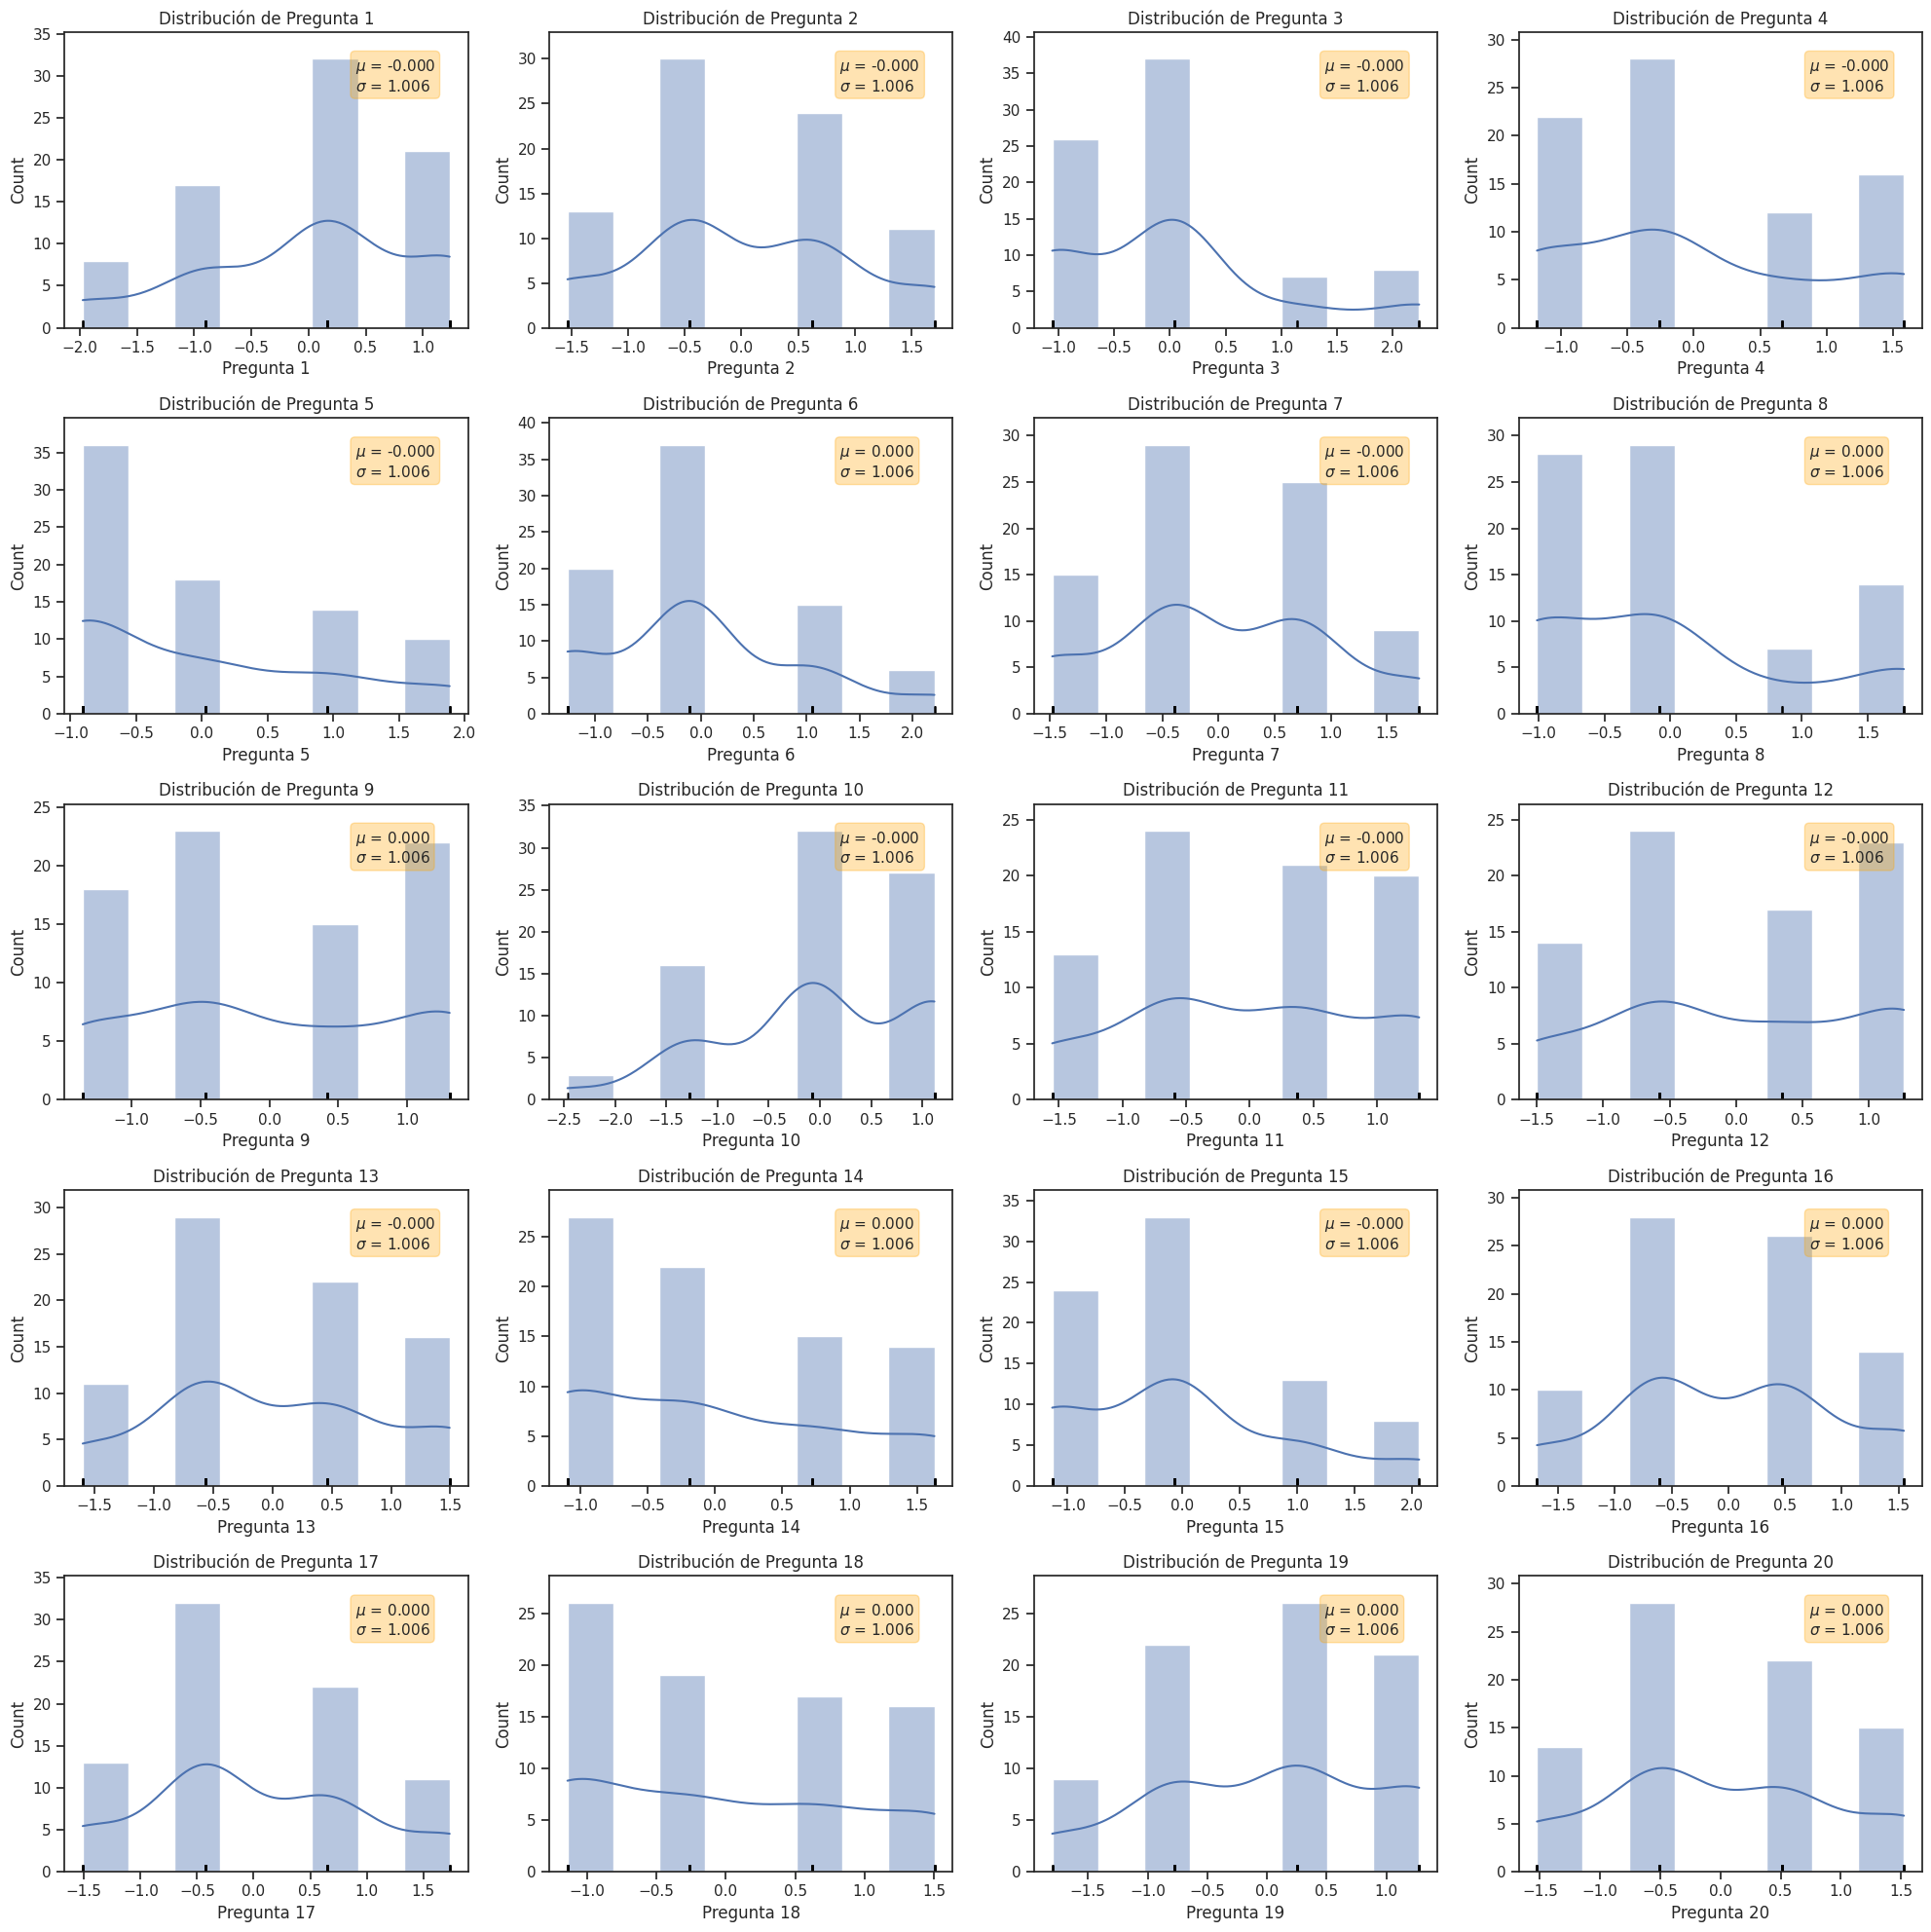

In [ ]:
print_dataset(df_std, 5, 4)

Se asume que no se tiene una previa categorización respecto al BECK por tanto se aplica Cluster: KMeans para agurpar el comportamiento de los individuos Codo de Jambu

Permite determinar cual es el cluster mas apropiado

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i, max_iter = 300)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

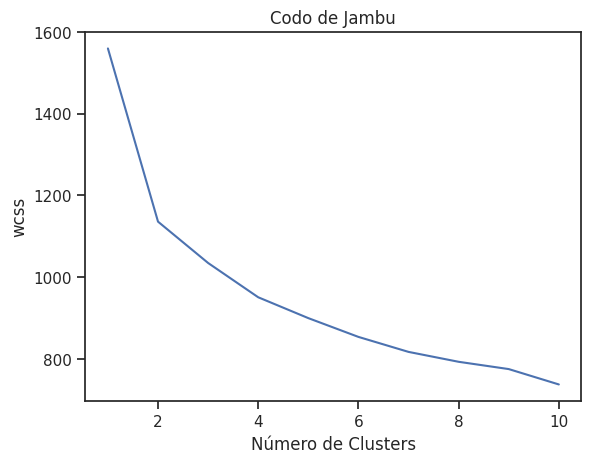

In [ ]:
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambu")
plt.xlabel("Número de Clusters")
plt.ylabel("wcss")
plt.show()

Se considera el clúster más apropiado donde la suma de los cuadrados de las distancias deja de caer bruscamente. Para este estudio en particular se tomará el valor de 2.

In [ ]:
kmeans = KMeans(n_clusters=2, max_iter = 300, random_state=0).fit(df_std)
kmeans

KMeans(n_clusters=2, random_state=0)

In [ ]:
df_std['KMeans_Clusters'] = kmeans.labels_
df_std['cATEGORIA'] = df['Categoria']
df_std.to_excel("ANSIEDAD_VIEW.xlsx")

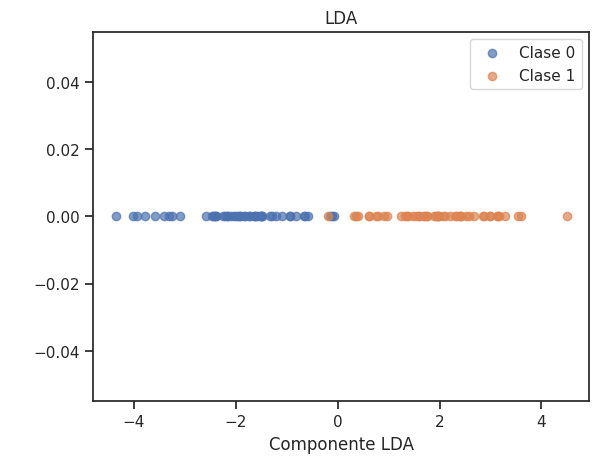

In [ ]:
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# Generar un conjunto de datos de ejemplo con 2 clases y 2 características
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)

# Crear una instancia de LDA
lda = LinearDiscriminantAnalysis(n_components=1)

# Ajustar el modelo a los datos
lda.fit(X, y)

# Transformar los datos al espacio de menor dimensión
X_transformed = lda.transform(X)

# Visualizar los datos en el nuevo espacio
plt.scatter(X_transformed[y == 0], [0] * sum(y == 0), label='Clase 0', alpha=0.7)
plt.scatter(X_transformed[y == 1], [0] * sum(y == 1), label='Clase 1', alpha=0.7)
plt.xlabel('Componente LDA')
plt.ylabel(' ')
plt.legend()
plt.title('LDA')
plt.show()

LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
df[X_cols] = StandardScaler().fit_transform(df[X_cols])
df_std = pd.DataFrame(df[X_cols], columns = df[X_cols].columns)

In [ ]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(df_std, df['Categoria'])
